
Dataset: Heart Disease 



------------------------------------------------------
Libraries
-------------------------------------------------------

In [1]:
# Libraries used in the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import graphviz
from sklearn.svm import SVC
from IPython.display import Image

------------------------------
Import the dataset
--------------------------------

In [2]:
# Read the dataset from a CSV file:
df = pd.read_csv('c:/Users/ual-laptop/Desktop/MIS 545/MIS 545/Project/Notebook/Final Project/heart.csv')
# show the dataset
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


-----------------------------------

Primary Statistics and shape of the dataset
------------------------------------------------------------------

In [3]:
# show the shape of the dataset:
print("Shape of the dataset is:")
print(df.shape)

# show the primary statistics of the dataset and round the results to 2 decimal places:
print("\nPrimary statistics of the dataset:")

df.describe().round(2)

Shape of the dataset is:
(1025, 14)

Primary statistics of the dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00
mean,54.43,0.70,0.94,131.61,246.00,0.15,0.53,149.11,0.34,1.07,1.39,0.75,2.32,0.51
std,9.07,0.46,1.03,17.52,51.59,0.36,0.53,23.01,0.47,1.18,0.62,1.03,0.62,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,132.00,0.00,0.00,1.00,0.00,2.00,0.00
50%,56.00,1.00,1.00,130.00,240.00,0.00,1.00,152.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,275.00,0.00,1.00,166.00,1.00,1.80,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


------------------------------
Type of the variables
------------------------------

In [4]:
# Show the datatypes of the dataset:
print("Datatypes of the dataset are:")
print(df.dtypes)

Datatypes of the dataset are:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


-------------------------------
Distribution of the variables using histograms
--------------------------------

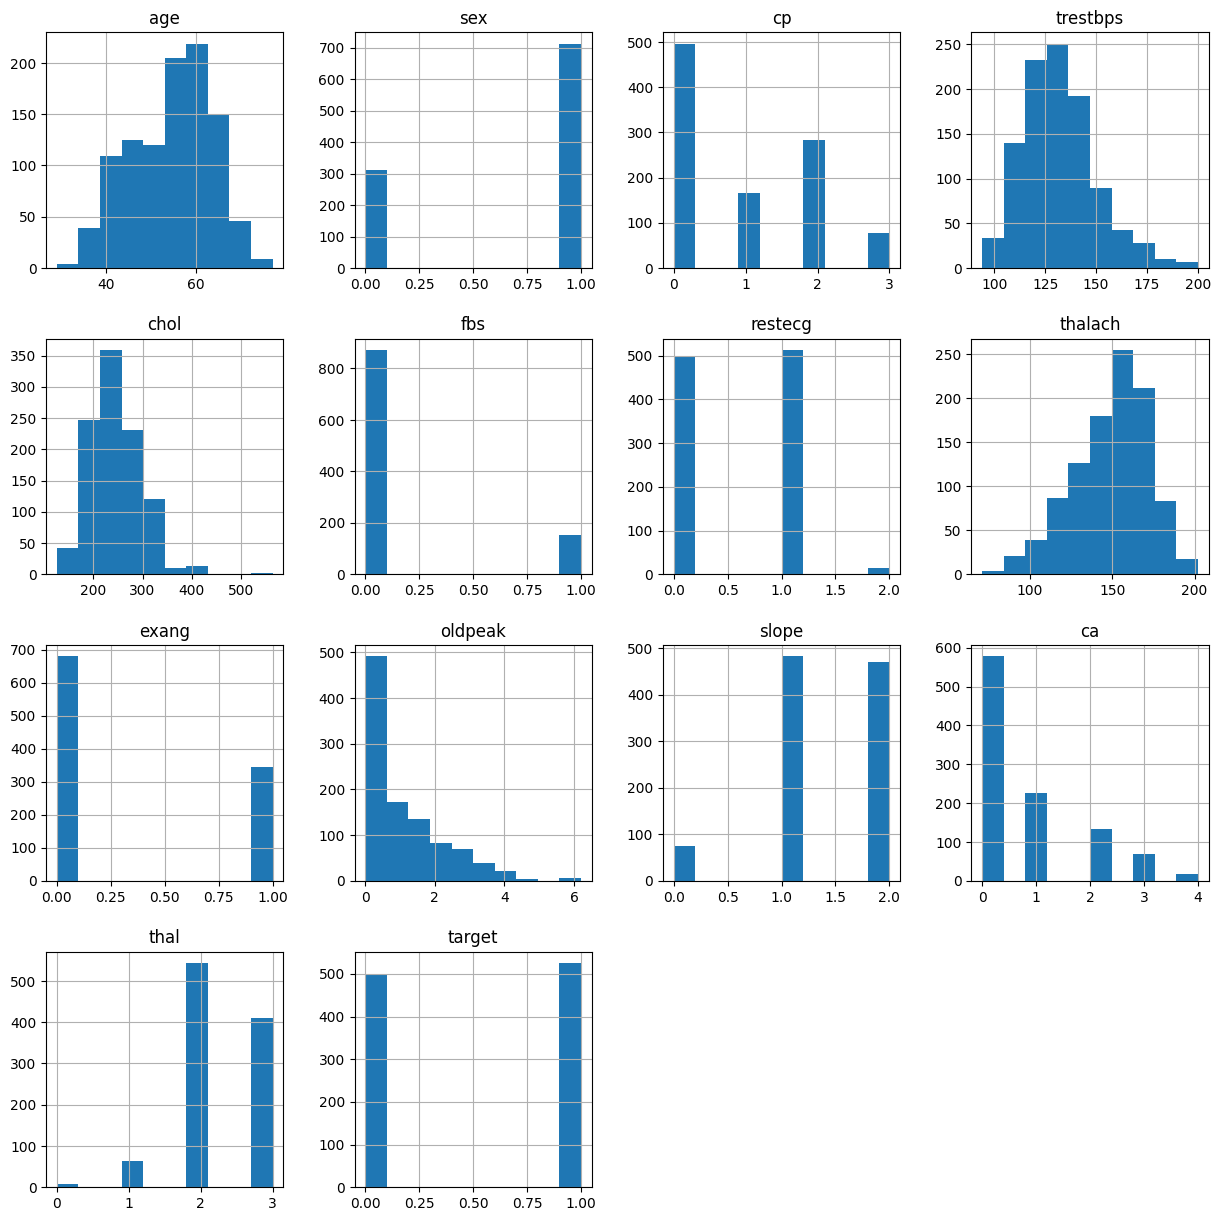

In [5]:
# show the distribution of the variables using histograms:
df.hist(figsize=(15,15))
plt.show()

---------------------------------------
Preprocessing
---------------------------------------

1. Check for missing values


In [6]:
# Check for any missing values using isnull() method:
print("Missing values in the dataset are:")
print(df.isnull().sum())

Missing values in the dataset are:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


2. Add some missing values randomly

In [7]:
# Set a fixed seed for reproducibility
np.random.seed(42)
# Add randomly some missing values to the columns including age, trestbps, chol, thalach, oldpeak (only continuous variables):
columns_with_missing = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
# Add missing values randomly to each column:
for col in columns_with_missing:
    num_missing = np.random.randint(0, 76)  # Generate a random number of missing values between 0 and 75
    missing_indices = np.random.choice(df.index, num_missing, replace=False)  # Randomly select row indices
    df.loc[missing_indices, col] = np.nan  # Set selected values to NaN

# Check for missing values using isnull() method:
print("Missing values in the dataset are:")
print(df.isnull().sum())

Missing values in the dataset are:
age         51
sex          0
cp           0
trestbps    68
chol        50
fbs          0
restecg      0
thalach     24
exang        0
oldpeak     26
slope        0
ca           0
thal         0
target       0
dtype: int64


3. Replace missing values with the average of each coloumn

In [8]:
# replace the missing values with the average of the column:
df['age'].fillna(df['age'].mean(), inplace=True)
df['trestbps'].fillna(df['trestbps'].mean(), inplace=True)
df['chol'].fillna(df['chol'].mean(), inplace=True)
df['thalach'].fillna(df['thalach'].mean(), inplace=True)
df['oldpeak'].fillna(df['oldpeak'].mean(), inplace=True)

# Check for any missing values using isnull() method:
print("Missing values in the dataset are:")
print(df.isnull().sum())

Missing values in the dataset are:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


4. Detect the outliers using boxplots

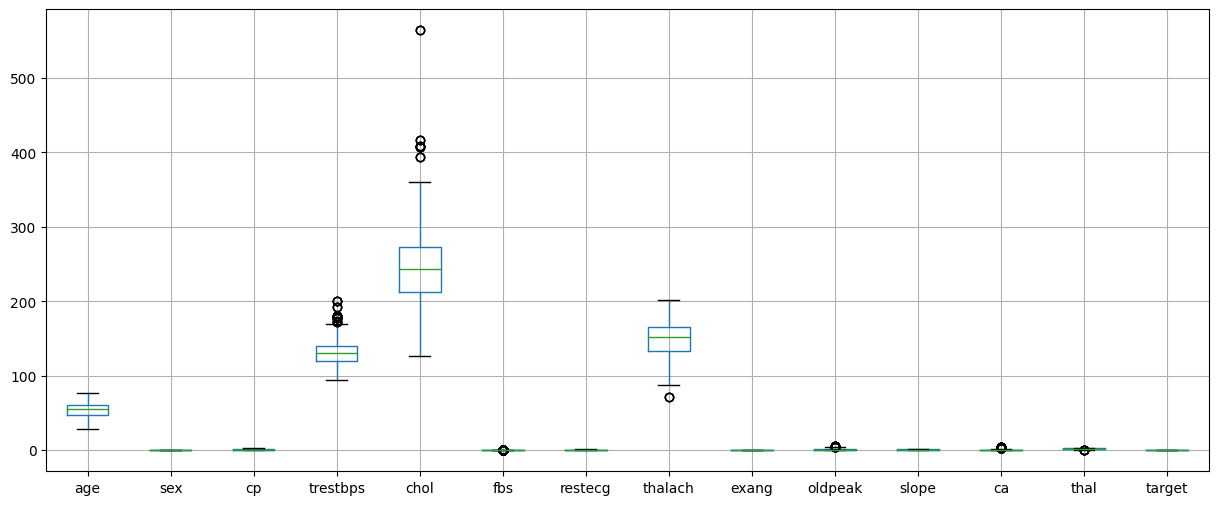

In [9]:
# Detect the outliers using boxplots 
df.boxplot(figsize=(15,6))
plt.show()

5. Remove the outliers using IQR method

In [10]:
# Remove the outliers for columns including age, trestbps, chol, thalach, oldpeak (only continuous variables):
# Check the shape of the dataset before removing the outliers:
print("Shape of the dataset before removing the outliers is:")
print(df.shape)

# Calculate the IQR only for continuous variables excluding 'fbs'
continuous_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
Q1 = df[continuous_vars].quantile(0.25)
Q3 = df[continuous_vars].quantile(0.75)
IQR = Q3 - Q1

# Remove the outliers
# Only apply the outlier criteria to the continuous variables
df = df[~((df[continuous_vars] < (Q1 - 1.5 * IQR)) | (df[continuous_vars] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Check the shape of the dataset after removing the outliers:
print("Shape of the dataset after removing the outliers is:")
print(df.shape)

Shape of the dataset before removing the outliers is:
(1025, 14)
Shape of the dataset after removing the outliers is:
(966, 14)


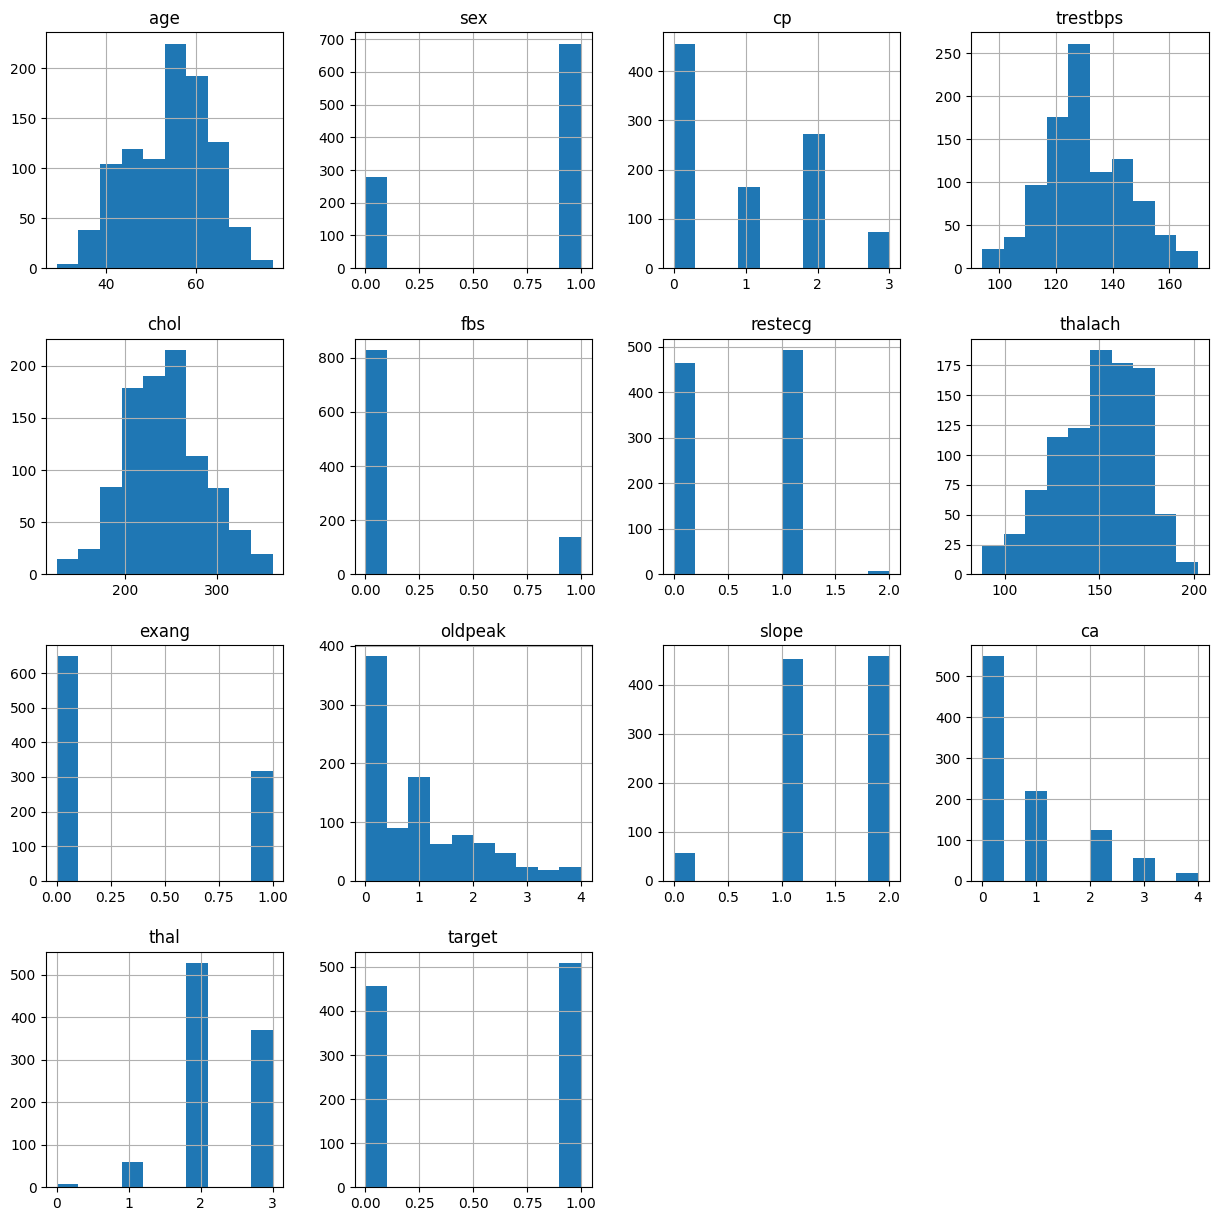

In [11]:
# show the distribution of the variables using histograms
df.hist(figsize=(15,15))
plt.show()

-------------------------------------------------------
Correlation Coefficients
-------------------------------------------------------

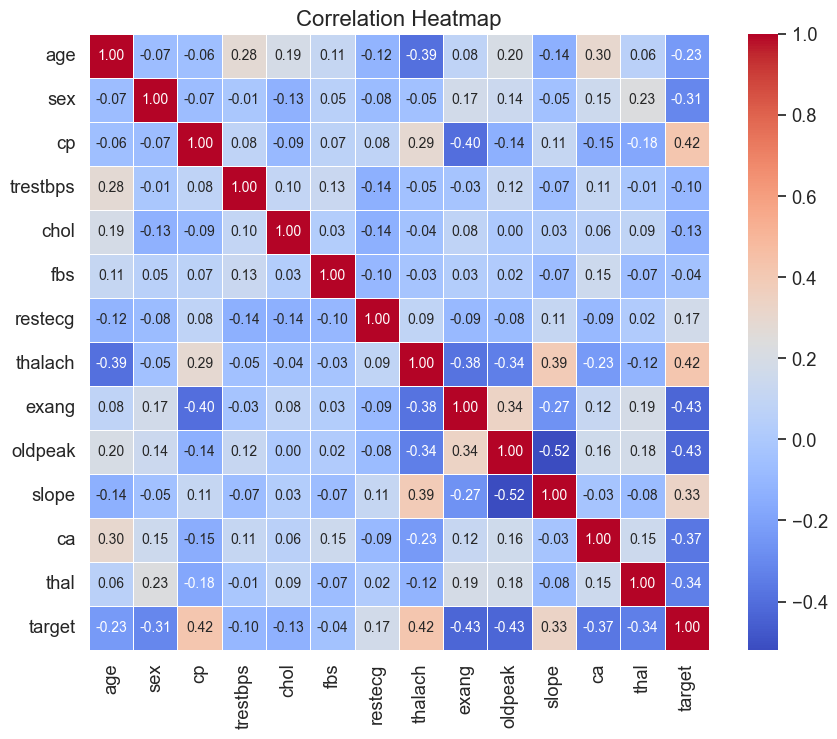

In [12]:
# Calculate the correlation coefficient between all variables and round the results to 2 decimal places:
corr = df.corr().round(2)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Set the font scale for better readability
sns.set(font_scale=1.2)

# Create a heatmap using Seaborn
heatmap = sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 10})

# Set the title and display the plot
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

------------------------------------------
Logistic Regression 
------------------------------------------

Split the dataset into two sets

In [13]:
# # Randomly split the data of df into mobilePhoneTraining (75% of records) and mobilePhoneTesting (25% of records) using 42 as the random seed.
heartTraining, heartTesting = train_test_split(df, test_size=0.25, random_state=42)

Check the class imbalance 

In [14]:
# Check if we have a class imbalance issue in target.
print('Number of records with target = 0: ' + str(len(heartTraining[heartTraining['target'] == 0])))
print('Number of records with target = 1: ' + str(len(heartTraining[heartTraining['target'] == 1])))
print("\n=> No class imbalance issue ✓")

Number of records with target = 0: 338
Number of records with target = 1: 386

=> No class imbalance issue ✓


Developing the model

In [15]:
# Logistic regression
independent_vars = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
X = df[independent_vars]
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.8917525773195877
Confusion Matrix:
[[80 12]
 [ 9 93]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88        92
           1       0.89      0.91      0.90       102

    accuracy                           0.89       194
   macro avg       0.89      0.89      0.89       194
weighted avg       0.89      0.89      0.89       194



c:\Users\ual-laptop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


----------------------------
K-Nearest Neighbors (KNN) Algorithm
----------------------------

In [16]:
# KNN
independent_vars = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
X = df[independent_vars]
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fitting KNN classifier to the training data
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  # Taking the k-value as 5, p=2 means Euclidean distance
classifier.fit(X_train, y_train)

# Predict the output 
y_pred = classifier.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.3f}%')

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Print the classification report
classification_rep = classification_report(y_test, y_pred)
print(f'Classification Report:\n{classification_rep}')


Accuracy: 89.691%
Confusion Matrix:
[[83  9]
 [11 91]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        92
           1       0.91      0.89      0.90       102

    accuracy                           0.90       194
   macro avg       0.90      0.90      0.90       194
weighted avg       0.90      0.90      0.90       194



----------------------------
Naive Bayesian Classifier (NBC)
----------------------------

In [17]:
# NBC
independent_vars = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
X = df[independent_vars]
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fitting Gaussian Naive Bayes classifier to our training data
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predict the output 
y_pred = classifier.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.3f}%')

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Print the classification report
classification_rep = classification_report(y_test, y_pred)
print(f'Classification Report:\n{classification_rep}')


Accuracy: 82.990%
Confusion Matrix:
[[74 18]
 [15 87]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.82        92
           1       0.83      0.85      0.84       102

    accuracy                           0.83       194
   macro avg       0.83      0.83      0.83       194
weighted avg       0.83      0.83      0.83       194



----------------------------
Support vector machines (SVM)
----------------------------

In [18]:
# SVM
independent_vars = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
X = df[independent_vars]
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fitting SVM classifier to our training data with a linear kernel
classifier = SVC(kernel='linear', random_state=42)
classifier.fit(X_train, y_train)

# Predict the output 
y_pred = classifier.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.3f}%')

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Print the classification report
classification_rep = classification_report(y_test, y_pred)
print(f'Classification Report:\n{classification_rep}')


Accuracy: 87.629%
Confusion Matrix:
[[76 16]
 [ 8 94]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.83      0.86        92
           1       0.85      0.92      0.89       102

    accuracy                           0.88       194
   macro avg       0.88      0.87      0.88       194
weighted avg       0.88      0.88      0.88       194



----------------------------
Decision Tree 
----------------------------

Developing the model

In [19]:
# DT
independent_vars = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
X = df[independent_vars]
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting Decision Tree classifier to our training data with Gini impurity
classifier = DecisionTreeClassifier(criterion='gini', random_state=42)
classifier.fit(X_train, y_train)

# Predict the output 
y_pred = classifier.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.3f}%')

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Print the classification report
classification_rep = classification_report(y_test, y_pred)
print(f'Classification Report:\n{classification_rep}')



Accuracy: 94.330%
Confusion Matrix:
[[87  5]
 [ 6 96]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94        92
           1       0.95      0.94      0.95       102

    accuracy                           0.94       194
   macro avg       0.94      0.94      0.94       194
weighted avg       0.94      0.94      0.94       194



Visualizing the Obtained Algorithm

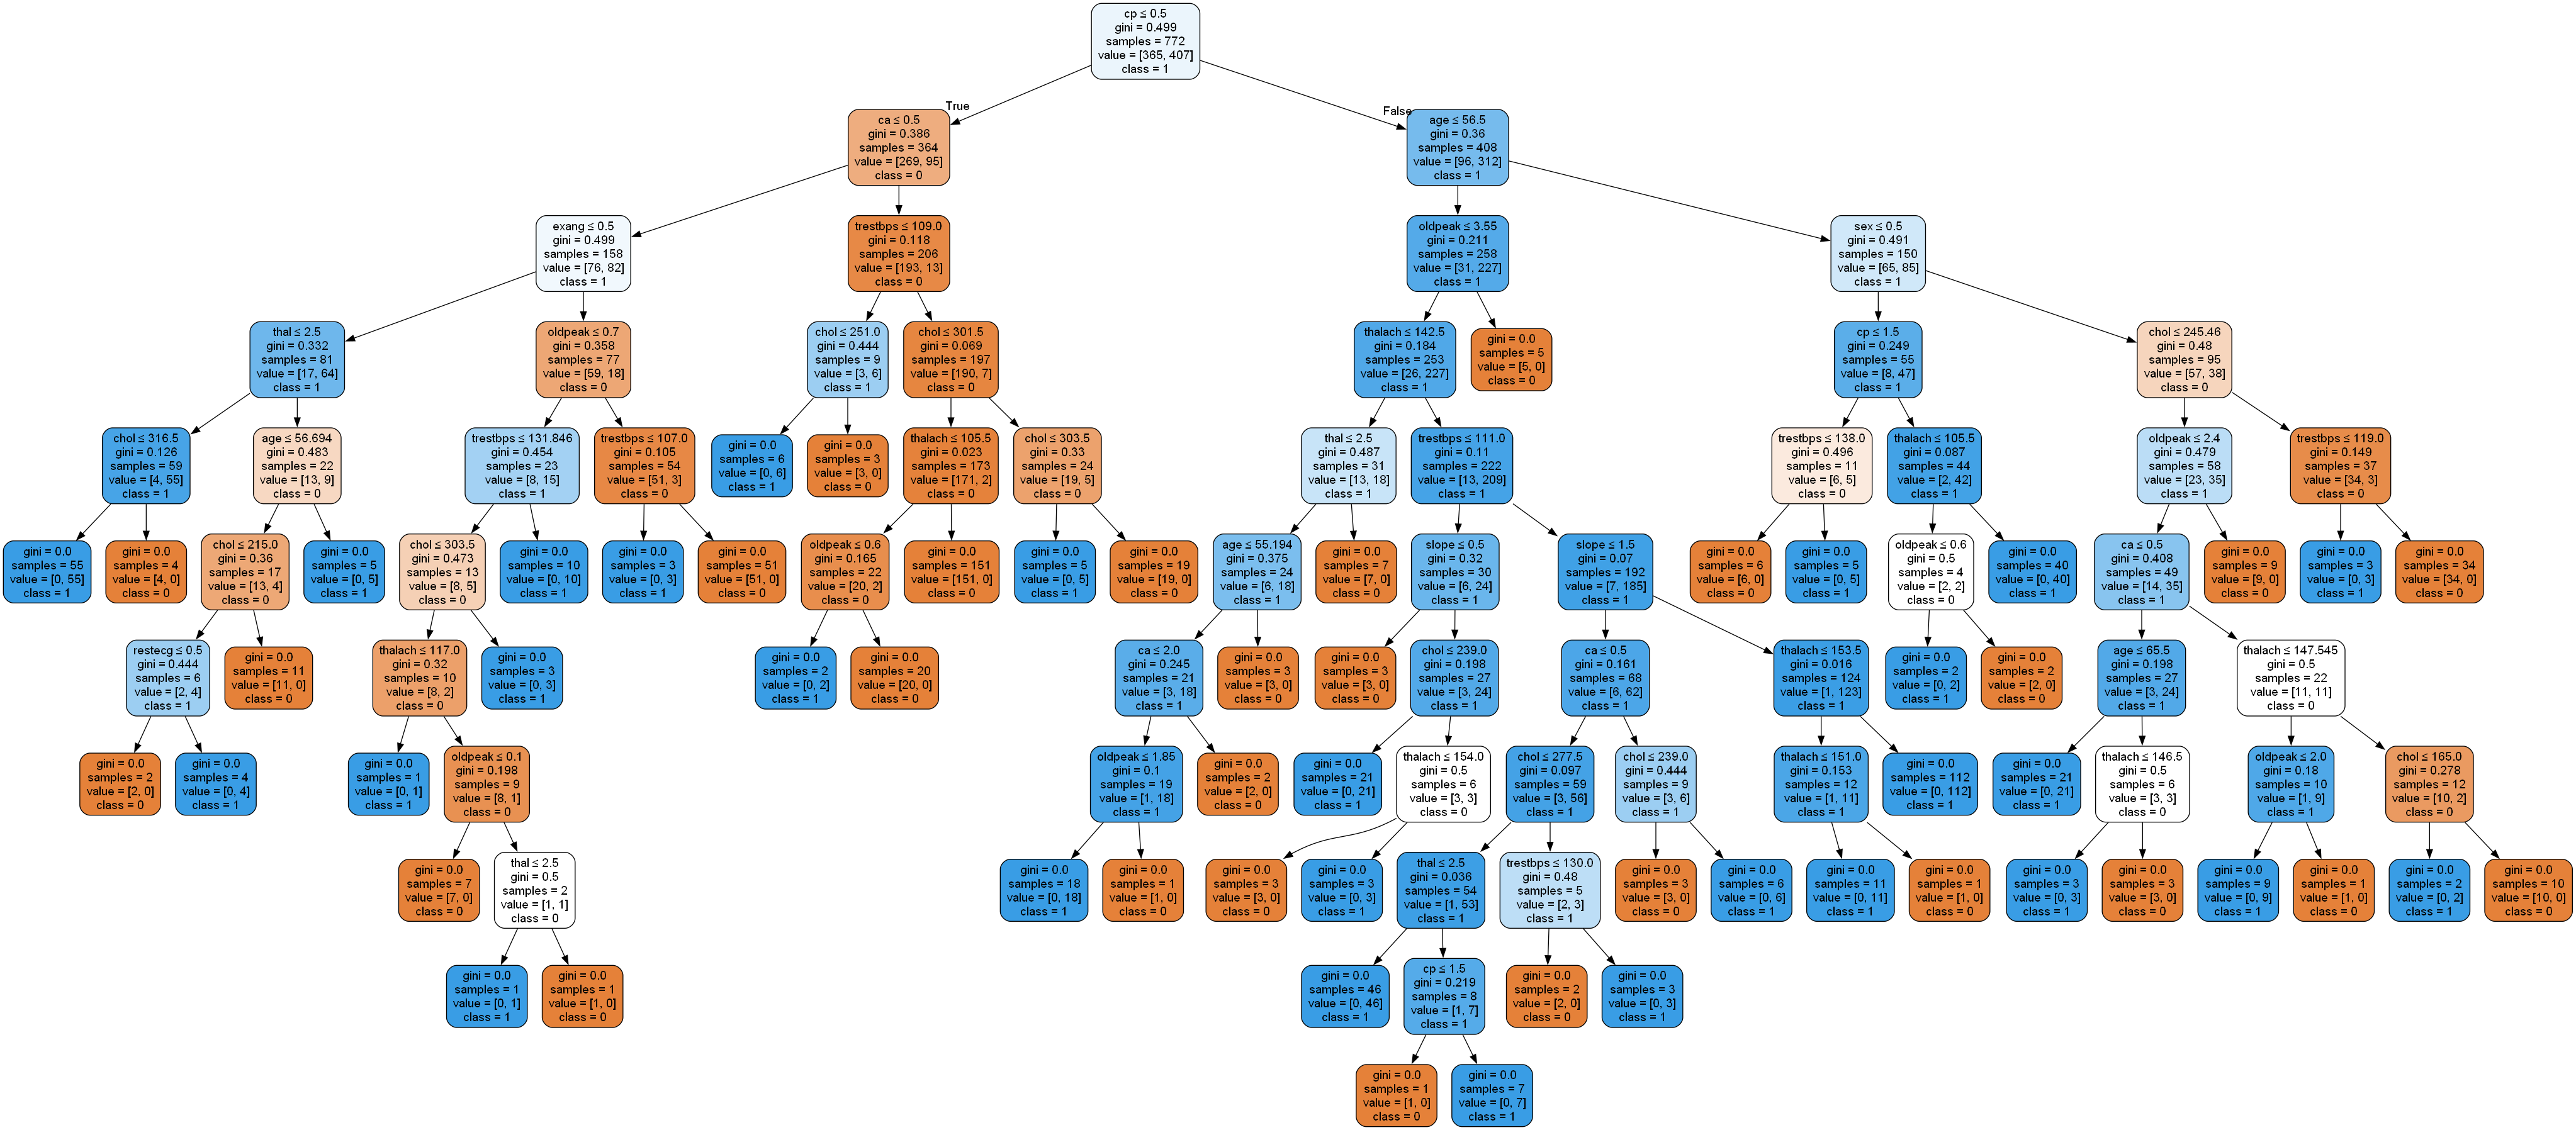

In [20]:
# DT
independent_vars = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
X = df[independent_vars]
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting Decision Tree classifier to our training data with Gini impurity
classifier = DecisionTreeClassifier(criterion='gini', random_state=42)
classifier.fit(X_train, y_train)

# Create a visualization of the decision tree with the specified location
graph_path = 'C:/Users/ual-laptop/Desktop/MIS 545/MIS 545/Project/Notebook/decision_tree'  # Change the path accordingly
dot_data = export_graphviz(classifier, out_file=None,
                           filled=True, rounded=True,
                           special_characters=True, feature_names=independent_vars, class_names=['0', '1'])
graph = graphviz.Source(dot_data)
graph.render(graph_path)  # Save the tree to a file

# Display the decision tree as a PNG image
graph.format = 'png'
graph.render(filename=f'{graph_path}')
Image(filename=f'{graph_path}.png')


-----------------------
Random Forest (RF)
-----------------------

In [21]:

# RF
independent_vars = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
X = df[independent_vars]
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting Random Forest classifier to our training data
classifier = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)
classifier.fit(X_train, y_train)

# Predict the output 
y_pred = classifier.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.3f}%')

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Print the classification report
classification_rep = classification_report(y_test, y_pred)
print(f'Classification Report:\n{classification_rep}')

Accuracy: 97.423%
Confusion Matrix:
[[90  2]
 [ 3 99]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        92
           1       0.98      0.97      0.98       102

    accuracy                           0.97       194
   macro avg       0.97      0.97      0.97       194
weighted avg       0.97      0.97      0.97       194



-----------------------
k-means clustering
-----------------------

In [22]:
# K-Means
n_clusters = 3

# Initialize the K-Means model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Get cluster assignments for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels back to the DataFrame if needed
df['cluster'] = cluster_labels

# Access the cluster centers and other attributes of the K-Means model
cluster_centers = kmeans.cluster_centers_
inertia = kmeans.inertia_  # Within-cluster sum of squares

# Print the cluster centers
print('Cluster Centers:')
print(cluster_centers)

# Print the inertia (within-cluster sum of squares)
print(f'Inertia: {inertia}')


c:\Users\ual-laptop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Centers:
[[5.44097798e+01 7.19730942e-01 1.04035874e+00 1.29842663e+02
  2.43684036e+02 1.34529148e-01 5.00000000e-01 1.52470223e+02
  2.93721973e-01 9.31036418e-01 1.39237668e+00 7.53363229e-01
  2.34080717e+00]
 [5.17366391e+01 7.39864865e-01 9.66216216e-01 1.27765826e+02
  1.93314189e+02 1.35135135e-01 6.38513514e-01 1.48702058e+02
  3.14189189e-01 1.01155142e+00 1.42905405e+00 5.81081081e-01
  2.19256757e+00]
 [5.64634882e+01 6.56250000e-01 8.03571429e-01 1.34290818e+02
  3.03330357e+02 1.65178571e-01 4.33035714e-01 1.44489417e+02
  4.19642857e-01 1.03243467e+00 1.44642857e+00 8.79464286e-01
  2.39285714e+00]]
Inertia: 1075271.1303456798


C:\Users\ual-laptop\AppData\Local\Temp\ipykernel_8000\714827883.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_labels


-------------------
Comparison of the models
-------------------

C:\Users\ual-laptop\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9733 (\N{BLACK STAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


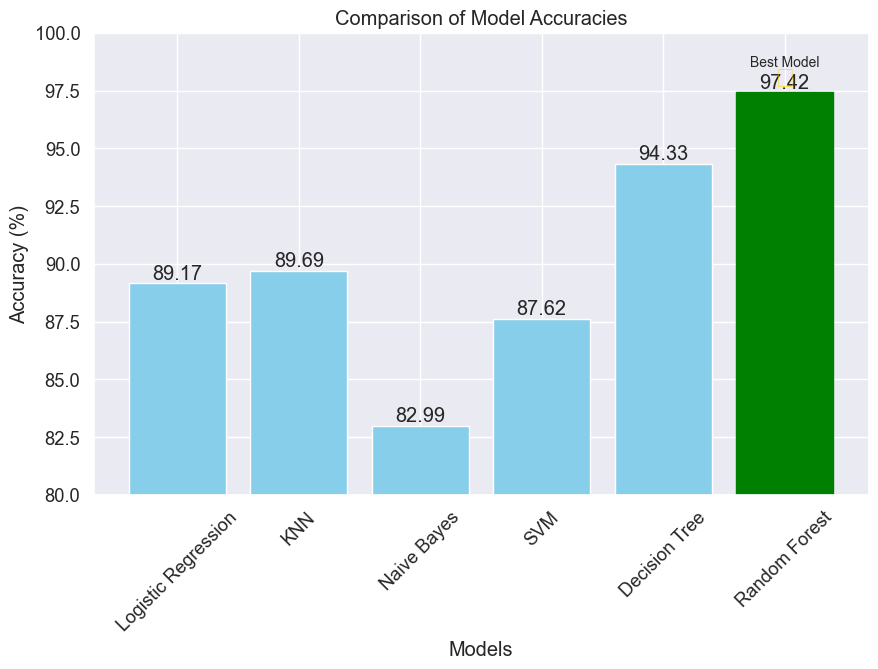

In [23]:
# Comparision of the performance of the models using a bar chart

models = ['Logistic Regression', 'KNN', 'Naive Bayes', 'SVM', 'Decision Tree', 'Random Forest']
accuracies = [89.17, 89.69, 82.99, 87.62, 94.33, 97.42]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color='skyblue')

# Highlight the Random Forest bar
bars[models.index('Random Forest')].set_color('green')  # Change color to green

# Adding a label on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

# Add a text annotation or a star
plt.text(models.index('Random Forest'), 97.42, '★', fontsize=20, ha='center', va='bottom', color='gold')
plt.text(models.index('Random Forest'), 97.42 + 1, 'Best Model', fontsize=10, ha='center', va='bottom')

plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Model Accuracies')
plt.ylim(80, 100)  # Extending the y-axis limit to accommodate labels
plt.xticks(rotation=45)
plt.show()
